# Heme bound to cytochrome C
This examples highlights the histidine residue of cytochrome C that binds to its heme ligand.

In [1]:
import numpy as np
import matplotlib.colors as colors
import biotite
import biotite.structure as struc
import biotite.structure.io.mmtf as mmtf
import biotite.database.rcsb as rcsb
import ammolite


PNG_SIZE = (400, 400)

In [2]:
# General configuration
ammolite.cmd.bg_color("white")
ammolite.cmd.set("cartoon_side_chain_helper", 1)
ammolite.cmd.set("cartoon_oval_length", 0.8)
ammolite.cmd.set("depth_cue", 0)
ammolite.cmd.set("valence", 0)

In [3]:
# Define colors used later
ammolite.cmd.set_color("lightorange",  colors.to_rgb(biotite.colors["lightorange"]))
ammolite.cmd.set_color("lightgreen",   colors.to_rgb(biotite.colors["lightgreen" ]))
ammolite.cmd.set_color("darkgreen",    colors.to_rgb(biotite.colors["darkgreen"  ]))

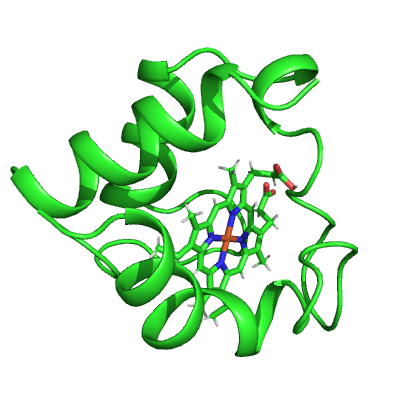

In [4]:
# Fetch and load cytochrome C structure and remove water 
mmtf_file = mmtf.MMTFFile.read(rcsb.fetch("1C75", "mmtf"))
structure = mmtf.get_structure(mmtf_file, model=1, include_bonds=True)
cyt_c = structure[structure.res_name != "HOH"]

pymol_cyt_c = ammolite.PyMOLObject.from_structure(cyt_c)
ammolite.show(PNG_SIZE)

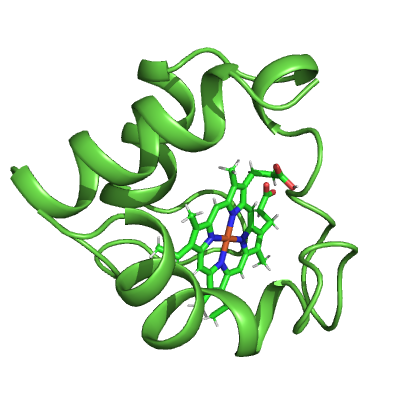

In [5]:
# Style protein
protein_mask = struc.filter_amino_acids(cyt_c)

pymol_cyt_c.show_as("cartoon", protein_mask)
pymol_cyt_c.color("lightgreen", protein_mask & (cyt_c.element == "C"))
ammolite.show(PNG_SIZE)

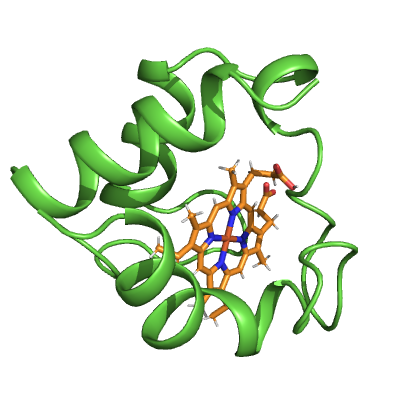

In [6]:
# Style heme group
heme_mask = (cyt_c.res_name == "HEM")

pymol_cyt_c.show_as("sticks", heme_mask)
pymol_cyt_c.color("lightorange", heme_mask & (cyt_c.element == "C"))
ammolite.show(PNG_SIZE)

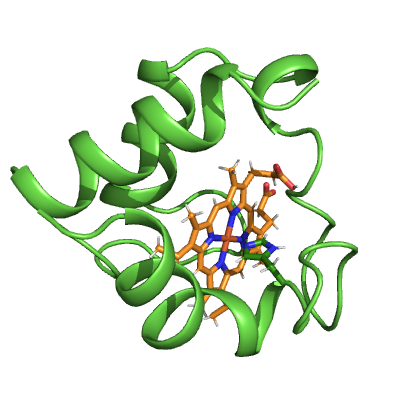

In [7]:
# Mark the histidine bound to heme as sticks
heme_iron_coord = cyt_c[cyt_c.element == "FE"].coord[0]
adjacency_mask = (struc.distance(cyt_c.coord, heme_iron_coord) < 2.0)
bound_nitrogen_mask = adjacency_mask & (cyt_c.res_name == "HIS")
his_mask = (cyt_c.res_id == cyt_c.res_id[bound_nitrogen_mask])

pymol_cyt_c.show("sticks", his_mask)
pymol_cyt_c.color(
    "darkgreen",
    his_mask & (cyt_c.element == "C") & (cyt_c.atom_name != "CA")
)
ammolite.show(PNG_SIZE)

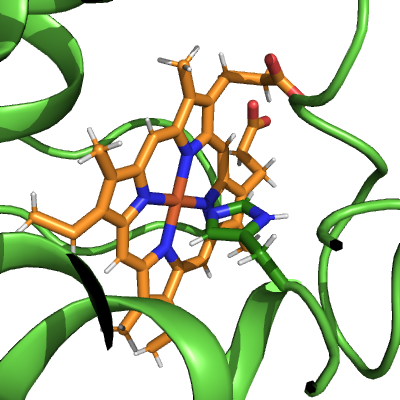

In [8]:
# Zoom into binding site
pymol_cyt_c.zoom(heme_mask | his_mask, buffer=1.0)
ammolite.show(PNG_SIZE)